In [1]:
#Used Libraries
import pandas as pd

In [2]:
#Loading raw_data
raw_data=pd.read_csv("Amazon Sale Report.csv")
raw_data.head(1)

C:\Users\gayth\AppData\Local\Temp\ipykernel_9548\3237984913.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN


In [3]:
raw_data.columns
##I will remove: unnamed 22, Slaes Channel, currency looking for solutions, ship country looking for solutions, B2B transform to dummies (categorical valriables to 1 and 0)
##fulfilled-by I may remove it, 

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [4]:
#1) Removing columns we don't need from dataframe
data=raw_data.drop(columns=['Unnamed: 22','index'])
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [5]:
#2) reassigning columns names for better readibility
data.rename(columns={'Order ID':'Order_ID','Sales Channel ':'Sales_Channel','Courier Status':'Courier_Status'},inplace=True)
data.columns

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [6]:
#3) Dealing with null values (NAN)
data.isnull().sum()

Order_ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales_Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier_Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [7]:
data['Courier_Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [8]:
###### For 'Courier_Status', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country' we will remove nan values
data.dropna(subset=['Courier_Status','ship-city', 'ship-state', 'ship-postal-code', 'ship-country'],inplace=True)
#Checking null values after action
L=['Courier_Status','ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
for i in L:
    print(data[i].isnull().sum())

0
0
0
0
0


In [9]:
data.isnull().sum()

Order_ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales_Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier_Status            0
Qty                       0
currency               6057
Amount                 6057
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         42276
B2B                       0
fulfilled-by          89678
dtype: int64

Data ELT still in progress...

In [11]:
data['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [12]:
#nan values in 'fulfilled-by' column indicate that products were not shipped by Easy Ship but by other means of shipment.
#we will replace nan values in this column by 'Others'
data['fulfilled-by']=data['fulfilled-by'].fillna('Others')

In [13]:
data['fulfilled-by'].head(10)

1     Easy Ship
2        Others
4        Others
5        Others
6        Others
7     Easy Ship
8        Others
9        Others
10       Others
11       Others
Name: fulfilled-by, dtype: object

In [14]:
data['promotion-ids'].unique()

array(['Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Unive

In [15]:
#cells containing no promotion-ids (nan) indicate that the product doens't have a promotion on its selling price.
#we replace nan in 'promotion-ids' column by No-Promo
data['promotion-ids']=data['promotion-ids'].fillna('No-Promo')

In [16]:
data['promotion-ids'].head()

1    Amazon PLCC Free-Financing Universal Merchant ...
2         IN Core Free Shipping 2015/04/08 23-48-5-108
4                                             No-Promo
5         IN Core Free Shipping 2015/04/08 23-48-5-108
6         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion-ids, dtype: object

In [17]:
data.isnull().sum()

Order_ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales_Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier_Status           0
Qty                      0
currency              6057
Amount                6057
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
promotion-ids            0
B2B                      0
fulfilled-by             0
dtype: int64

In [18]:
data['currency'].unique()

array(['INR', nan], dtype=object)

In [19]:
#We will set the currecncies to a unique universal currency which's the USD
data['currency']='USD'
data['currency'].unique()

array(['USD'], dtype=object)

In [20]:
#Let's deal with the Amount column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

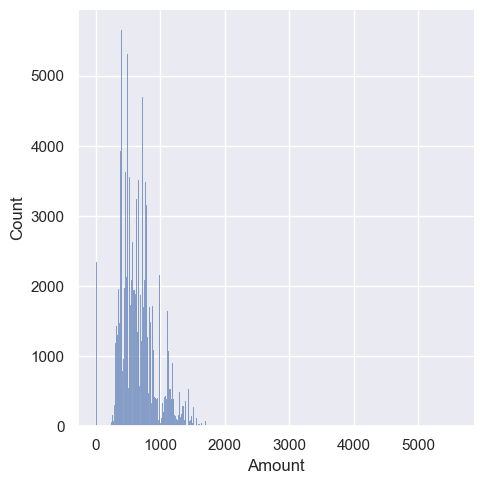

In [21]:
sns.displot(data['Amount'])

In [22]:
#As we can see we have some outliers.=data['
#So we will fill the missing values in 'Amount' with the median of the data not the mean to not affect the whole data measurements.
data['Amount']=data['Amount'].fillna(data['Amount'].median())

In [23]:
data['Amount'].isnull().sum()

0

In [24]:
data['Amount'].median()

606.0

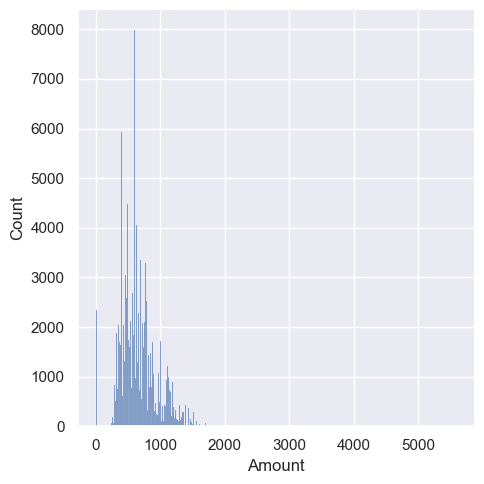

In [25]:
sns.displot(data['Amount'])

In [26]:
#As we can see the data doesn't change in global scale and this is our goal to replac nan values with the median.
#Now let's transform amounts from INR to USD
# 1 INR = 0.011 USD
Coef=0.011
data['Amount']=data['Amount']*Coef

In [27]:
data['Amount']

1          4.466
2          3.619
4          6.314
5          9.064
6          7.183
           ...  
128970     5.687
128971    10.989
128972     7.590
128973    13.189
128974     7.656
Name: Amount, Length: 122073, dtype: float64

In [28]:
data.head()

,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,USD,4.466,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,USD,3.619,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Others
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,USD,6.314,CHENNAI,TAMIL NADU,600073.0,IN,No-Promo,False,Others
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,1,USD,9.064,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Others
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,1,USD,7.183,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Others


In [29]:
#Dealing with ship-postal-code
data['ship-postal-code'].dtype

dtype('float64')

In [30]:
data['ship-postal-code'].astype(int)

1         560085
2         410210
4         600073
5         201102
6         160036
           ...  
128970    500013
128971    122004
128972    500049
128973    389350
128974    492014
Name: ship-postal-code, Length: 122073, dtype: int32

In [31]:
#Dealing with date values
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')

In [32]:
data['Date'].head()

1   2022-04-30
2   2022-04-30
4   2022-04-30
5   2022-04-30
6   2022-04-30
Name: Date, dtype: datetime64[ns]

In [33]:
#we will reassign index in order
data=data.reset_index(drop=True)

In [34]:
data.head()

,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,USD,4.466,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,USD,3.619,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Others
2,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,USD,6.314,CHENNAI,TAMIL NADU,600073.0,IN,No-Promo,False,Others
3,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,1,USD,9.064,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Others
4,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,1,USD,7.183,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Others


In [75]:
data.shape[0]/3

40691.0

In [79]:
#Saving our Claned dataset to csv files
#I will sliced in to 3 subsets to make it able to push it to Github because of the its large size
i=raw_data.shape[0]//3
N=raw_data.shape[0]
j=0
n=0
while i <=N:
    df=data[j:i]
    df.to_csv(f"Amazon-Sale-Report-{n}.csv",index=False)
    n+=1
    j=i
    i+=data.shape[0]//3